# Задание 1

### Найти данные для кластеризации. Данные в группе не должны повторяться. Если признаки в данных имеют очень сильно разные масштабы, то необходимо данные предварительно нормализовать.

In [1]:
!pip install opendatasets

In [3]:
!pip install kneed

In [20]:
import opendatasets as od


od.download('https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kirillkim71
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering


100%|██████████| 4.36k/4.36k [00:00<00:00, 7.40MB/s]

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly.express as px

# kirillkim71
# 39d1b74c7680ac8e32302e0efa5ae562

In [22]:
df_without_scaler = pd.read_csv("/content/wine-dataset-for-clustering/wine-clustering.csv")
df_without_scaler

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [23]:
df_without_scaler.isna().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [24]:
df_without_scaler = df_without_scaler.dropna()

In [25]:
df_without_scaler.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [27]:
df_without_scaler.duplicated().sum()

np.int64(0)

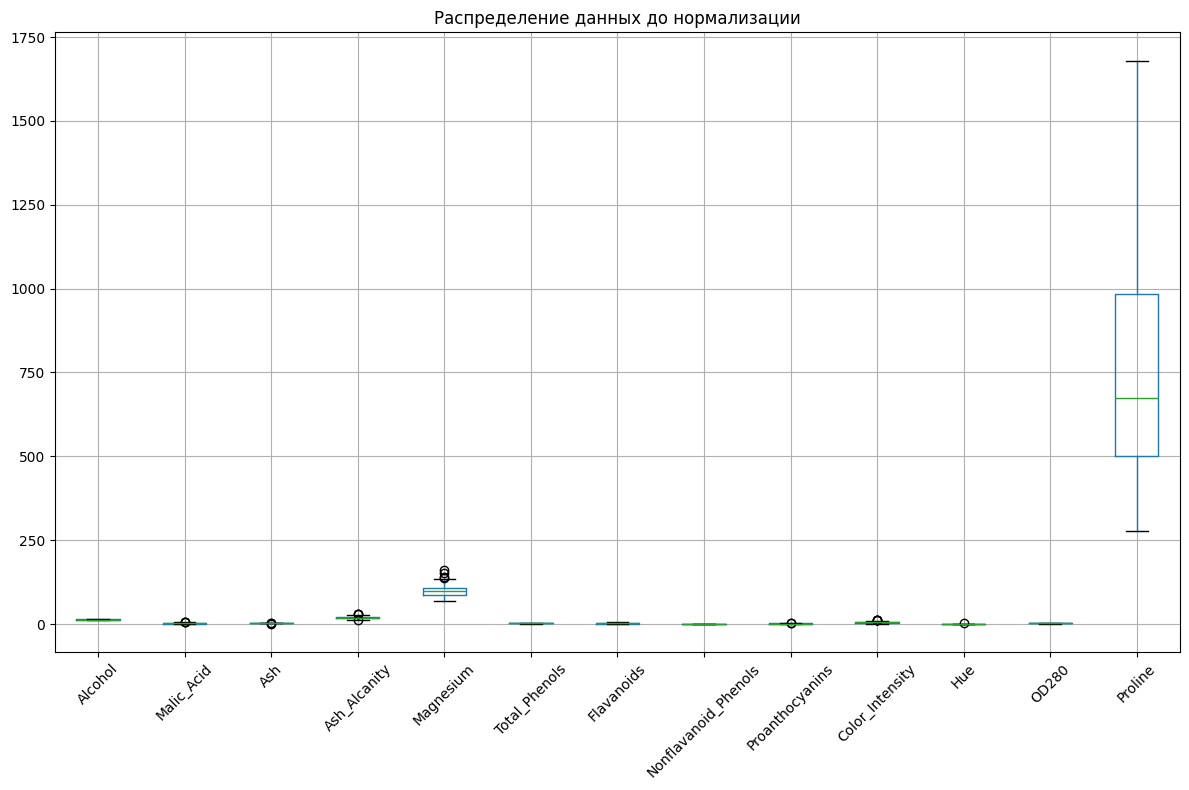

In [31]:
plt.figure(figsize=(12, 8))
df_without_scaler.boxplot()
plt.title('Распределение данных до нормализации')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
scaler = StandardScaler()
df = scaler.fit_transform(df_without_scaler)
preprocessed = pd.DataFrame(data=df, columns=df_without_scaler.columns)
preprocessed

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


# Задание 2

### Провести кластеризацию данных с помощью алгоритма k-means. Использовать «правило локтя» и коэффициент силуэта для поиска оптимального количества кластеров.

In [34]:
costfun = []
koeffs = []
for i in range(2, 12):
    model_kmeans = KMeans(n_clusters=i, random_state=42)
    model_kmeans.fit(df)
    costfun.append(model_kmeans.inertia_)
    koeffs.append(silhouette_score(df, model_kmeans.labels_))

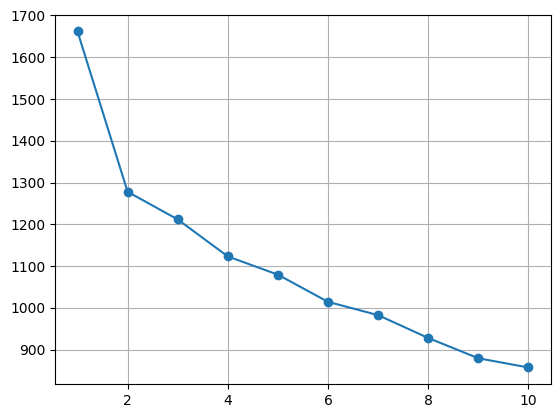

In [35]:
plt.plot(range(1, 11), costfun, marker='o')
plt.grid()
plt.show()

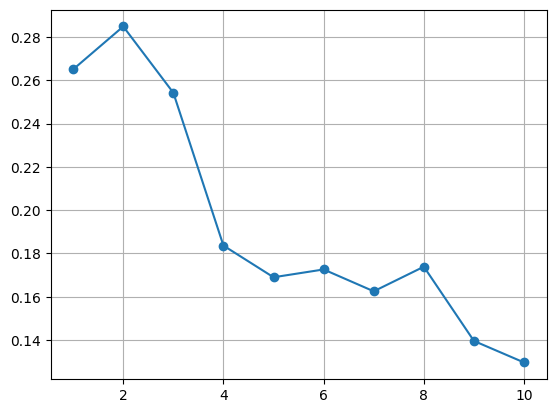

In [36]:
plt.plot(range(1, 11), koeffs, marker='o')
plt.grid()
plt.show()

In [37]:
model_kmeans2 = KMeans(n_clusters=6, random_state=123)
kmeans = model_kmeans2.fit(df)

labels_kmeans = model_kmeans2.labels_
df_labels = pd.DataFrame(labels_kmeans, columns=['KMeans'])
df_labels.value_counts()

,count
KMeans,
1,55
4,28
5,27
3,26
2,24
0,18


# Задание 3

### Провести кластеризацию данных с помощью алгоритма иерархической кластеризации.

In [38]:
model_AggClustering = AgglomerativeClustering(n_clusters=6, compute_distances=True)
aggclustering = model_AggClustering.fit(df)

labels_agg = model_AggClustering.labels_
df_labels = pd.DataFrame(labels_agg, columns=['AGG_Clust'])
df_labels.value_counts()

,count
AGG_Clust,
1,58
2,36
0,30
3,28
4,20
5,6


# Задание 4

### Провести кластеризацию данных с помощью алгоритма DBSCAN.

In [39]:
optimal_eps_df = df
n_neighbors = 10
nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(optimal_eps_df)
distances, indices = nbrs.kneighbors(optimal_eps_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

knee_locator = KneeLocator(range(1, len(distances) + 1), distances, curve="convex", direction="increasing")
optimal_eps = knee_locator.knee_y
print(optimal_eps)

2.419984724494284


In [40]:
model_dbscan = DBSCAN(eps=0.8, min_samples=5)
clusters_dbscan = model_dbscan.fit_predict(df)

labels_dbscan = model_dbscan.labels_
df_labels = pd.DataFrame(labels_dbscan, columns=['DBSCAN'])
df_labels.value_counts()

,count
DBSCAN,
-1,178


# Задание 4

### Визуализировать кластеризованные данные с помощью t-SNE или UMAP, если необходимо. Если данные трехмерные, то можно использовать трехмерный точечный график.

##### KMeans

In [41]:
tsne_kmeans = TSNE(n_components=2, random_state=123)
tsne_result_kmeans = tsne_kmeans.fit_transform(df)
tsne_df_kmeans = pd.DataFrame(data=tsne_result_kmeans, columns=['TSNE1', 'TSNE2'])
tsne_df_kmeans['Cluster'] = model_kmeans2.labels_

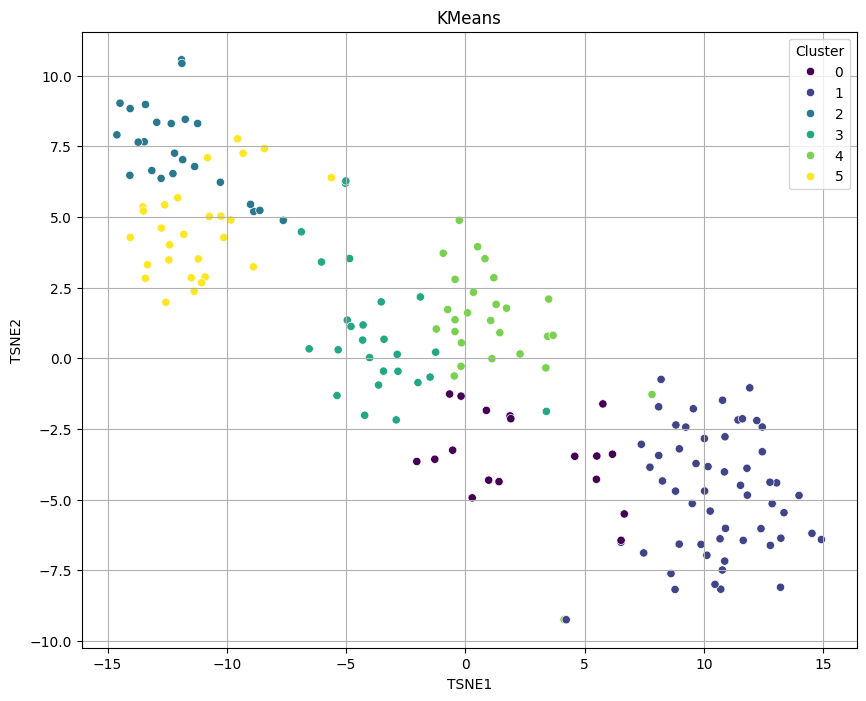

In [42]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', data=tsne_df_kmeans, hue='Cluster', palette='viridis', legend='full')
plt.title('KMeans')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [43]:
tsne_kmeans_3d = TSNE(n_components=3, random_state=42)
tsne_df2 = tsne_kmeans_3d.fit_transform(df)

fig = px.scatter_3d(
    x=tsne_df2[:, 0],
    y=tsne_df2[:, 1],
    z=tsne_df2[:, 2],
    color=model_kmeans2.labels_,
    title='KMeans',
    labels={'x': 'C1', 'y': 'C2', 'z': 'C3'},
    opacity=0.8,
    size_max=5,
    color_continuous_scale='viridis'
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Component 1'),
        yaxis=dict(title='Component 2'),
        zaxis=dict(title='Component 3')
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)
fig.update_traces(marker=dict(size=5))
fig.show()

##### AgglomerativeClustering

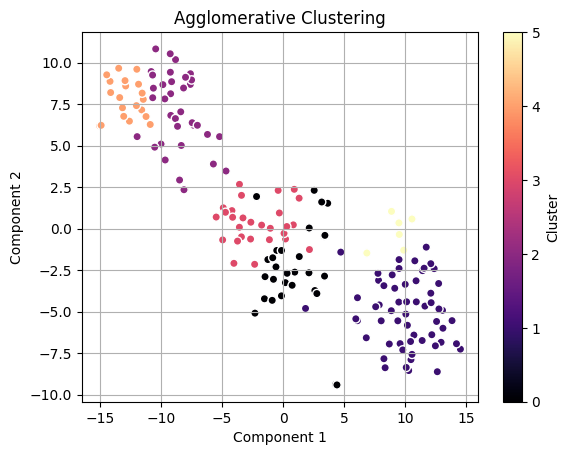

In [45]:
tsne_ag = TSNE(n_components=2, random_state=42)
tsne_result_agg = tsne_ag.fit_transform(df)

plt.scatter(tsne_result_agg[:, 0], tsne_result_agg[:, 1], c=aggclustering.labels_, cmap='magma', edgecolor='white')
plt.title('Agglomerative Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [46]:
tsne_ag_2d = TSNE(n_components=3, random_state=42)
tsne_result_ag = tsne_ag_2d.fit_transform(df)

fig = go.Figure(data=[go.Scatter3d(
    x=tsne_result_ag[:, 0],
    y=tsne_result_ag[:, 1],
    z=tsne_result_ag[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=aggclustering.labels_,
        colorscale='magma',
        opacity=0.8
    )
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Component 1'),
        yaxis=dict(title='Component 2'),
        zaxis=dict(title='Component 3')
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)
fig.update_traces(marker=dict(size=5))
fig.show()

#### DBSCAN

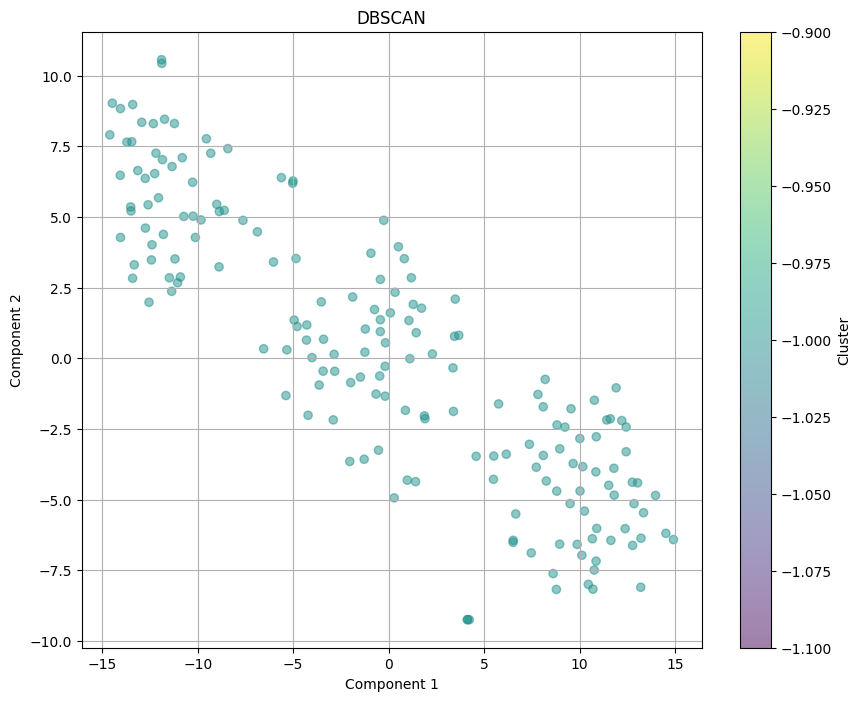

In [47]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=123)
tsne_result_dbscan = tsne.fit_transform(df)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_result_dbscan[:, 0], tsne_result_dbscan[:, 1], c=clusters_dbscan, cmap='viridis', marker='o', alpha=0.5)
plt.title('DBSCAN')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [48]:
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(df)

fig = go.Figure(data=[go.Scatter3d(
    x=tsne_result[:, 0],
    y=tsne_result[:, 1],
    z=tsne_result[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=clusters_dbscan,
        colorscale='viridis',
        opacity=0.8
    )
)])

fig.update_layout(title='DBSCAN',
                  scene=dict(xaxis=dict(title='Component 1'),
                             yaxis=dict(title='Component 2'),
                             zaxis=dict(title='Component 3')))
fig.show()